In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv("./data/data.csv")
data.head()

,Unnamed: 0,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,0,3.688879,State-gov,11.258253,Bachelors,1.135322,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,-0.035080,United-States,<=50K
1,1,3.931826,Self-emp-not-inc,11.330348,Bachelors,1.135322,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.227904,United-States,<=50K
2,2,3.663562,Private,12.281398,HS-grad,-0.419772,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035080,United-States,<=50K
3,3,3.988984,Private,12.366157,11th,-1.197318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035080,United-States,<=50K
4,4,3.367296,Private,12.732013,Bachelors,1.135322,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035080,Cuba,<=50K


In [161]:
final_df_training = pd.read_csv("./data/final_df_training.csv")
final_df_training.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,0,3.688879,11.258253,7.684784,0.0,1.135322,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
1,1,3.931826,11.330348,0.000000,0.0,1.135322,-2.227904,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
2,2,3.663562,12.281398,0.000000,0.0,-0.419772,-0.035080,0,0,0,...,0,0,0,0,0,0,1,0,1,-1.0
3,3,3.988984,12.366157,0.000000,0.0,-1.197318,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,-1.0
4,4,3.367296,12.732013,0.000000,0.0,1.135322,-0.035080,0,0,0,...,0,1,0,0,1,0,0,1,0,-1.0


In [162]:
final_df_prediction = pd.read_csv("./data/final_df_prediction.csv")
final_df_prediction.head()

,Unnamed: 0,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,5000,3.871201,11.285121,10.233834,0.000000,1.912869,0.777077,0,0,0,...,0,0,0,0,0,0,1,0,1,NaN
1,5001,4.025352,11.928176,0.000000,7.372118,1.135322,-0.197511,0,0,0,...,0,0,0,0,0,0,1,1,0,NaN
2,5002,3.295837,11.795560,8.519989,0.000000,-0.419772,-0.035080,0,0,0,...,0,1,0,0,0,0,1,1,0,NaN
3,5003,3.367296,11.993343,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,1,0,0,0,0,0,1,1,0,NaN
4,5004,3.610918,11.040471,0.000000,0.000000,-0.419772,-0.035080,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN


In [163]:
print(len(data))
print(len(final_df_training))
print(len(final_df_prediction))

30000
5000
25000


In [164]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

def evaulation(test_y:np.ndarray,pred_y:np.ndarray):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

    print(f"Accuracy Score : {np.round(accuracy_score(test_y,pred_y)*100,2)}%")
    print(f"Recall Score : {np.round(recall_score(test_y,pred_y)*100,2)}%")
    print(f"Precision Score : {np.round(precision_score(test_y,pred_y)*100,2)}%")
    print(f"F1 Score : {np.round(f1_score(test_y,pred_y)*100,2)}%")

    print("\n")

    cm = confusion_matrix(test_y, pred_y)

    print(f"Confusion Matrix : \n{cm}")

    # return accuracy_score(test_y,pred_y)

In [165]:
X = final_df_training.drop(columns=['Unnamed: 0','Income'],axis=1)
y = final_df_training["Income"]

In [166]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)
X_pred = final_df_prediction.drop(columns=['Unnamed: 0','Income'],axis=1)

In [167]:
X_train[0:5]

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Never-worked,Employment_Type_ Private,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
3413,3.555348,12.739465,8.895493,0.0,1.135322,1.589234,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1610,4.077537,12.262207,0.000000,0.0,-0.808545,0.939509,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3459,3.091042,12.784855,0.000000,0.0,-0.419772,-0.035080,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4293,3.526361,12.238119,0.000000,0.0,-0.030998,-0.035080,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1039,3.555348,12.009510,0.000000,0.0,-1.197318,-2.633982,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


# Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [169]:
LR.fit(X_train,y_train)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
y_pred = LR.predict(X_test)
evaulation(y_test,y_pred)

Accuracy Score : 84.4%
Recall Score : 55.51%
Precision Score : 74.32%
F1 Score : 63.55%


Confusion Matrix : 
[[708  47]
 [109 136]]


In [171]:
y_pred_wo_income = LR.predict(X_pred)

Income
 <=50K    20075
 >50K      4925
dtype: int64


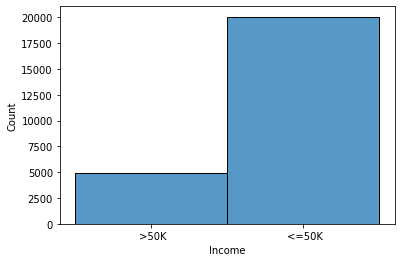

In [172]:
print(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the LR model

In [179]:
import warnings

In [178]:
clf_LR = LogisticRegression()
params_LR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'saga'],
    'max_iter': [100,200,300,500]
    # 'multi_class': ['auto', 'ovr', 'multinomial']
}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Fit the classifier
    
    grid_search_LR = GridSearchCV(clf_LR,params_LR);
    grid_search_LR.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_LR.best_params_)
print("Best Score:", grid_search_LR.best_score_)

best_model_LR = grid_search_LR.best_estimator_

y_pred_LR2 = best_model_LR.predict(X_test)
evaulation(y_test,y_pred_LR2)

Best Hyperparameters: {'C': 1.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8414999999999999
Accuracy Score : 84.1%
Recall Score : 55.51%
Precision Score : 73.12%
F1 Score : 63.11%


Confusion Matrix : 
[[705  50]
 [109 136]]


In [96]:
LR2 = LogisticRegression(penalty="l2",solver="saga",max_iter=500)
LR2.fit(X_train,y_train)
y_pred_LR2 = LR2.predict(X_test)
evaulation(y_test,y_pred_LR2)

Accuracy Score : 84.4%
Recall Score : 55.1%
Precision Score : 74.59%
F1 Score : 63.38%


Confusion Matrix : 
[[709  46]
 [110 135]]


c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Decision Trees


In [184]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)
evaulation(y_test,y_pred_DT)

Accuracy Score : 80.4%
Recall Score : 59.18%
Precision Score : 60.17%
F1 Score : 59.67%


Confusion Matrix : 
[[659  96]
 [100 145]]


Income
 <=50K    18890
 >50K      6110
dtype: int64


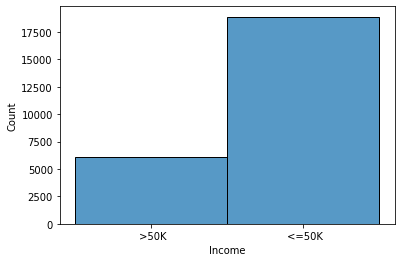

In [185]:
y_pred_wo_income_DT = DT.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning the DT model

In [186]:
clf_DT = DecisionTreeClassifier()

params_DT = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid_search_DT = GridSearchCV(clf_DT,params_DT);
grid_search_DT.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_DT.best_params_)
print("Best Score:", grid_search_DT.best_score_)

best_model_DT = grid_search_DT.best_estimator_

y_pred_DT2 = best_model_DT.predict(X_test)
evaulation(y_test,y_pred_DT2)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.84375
Accuracy Score : 84.2%
Recall Score : 52.24%
Precision Score : 75.74%
F1 Score : 61.84%


Confusion Matrix : 
[[714  41]
 [117 128]]


Income
 <=50K    18890
 >50K      6110
dtype: int64


Income
 <=50K    20768
 >50K      4232
dtype: int64


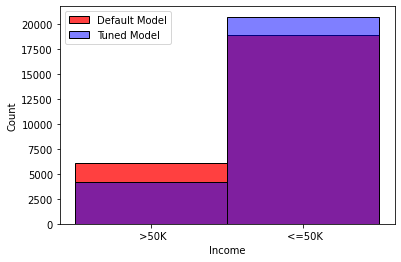

In [187]:
y_pred_wo_income_DT2 = best_model_DT.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_DT,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_DT2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

In [149]:
# tuned_model = DecisionTreeClassifier(max_depth=7,min_samples_split=2,min_samples_leaf=2,max_features=None,criterion='gini')
# tuned_model.fit(X_train,y_train)
# evaulation(y_test,tuned_model.predict(X_test))

Accuracy Score : 84.6%
Recall Score : 53.06%
Precision Score : 76.92%
F1 Score : 62.8%


Confusion Matrix : 
[[716  39]
 [115 130]]


# Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)
evaulation(y_test,y_pred_RF)

Accuracy Score : 83.5%
Recall Score : 58.37%
Precision Score : 69.42%
F1 Score : 63.41%


Confusion Matrix : 
[[692  63]
 [102 143]]


Income
 <=50K    19924
 >50K      5076
dtype: int64


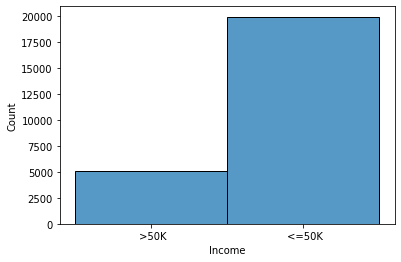

In [189]:
y_pred_wo_income_RF = RF.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning RandomForest

In [191]:
clf_RF = RandomForestClassifier()
params_RF = {
    'n_estimators': [50,100,300],
    'criterion': ["gini","entropy"],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search_RF = GridSearchCV(clf_RF,params_RF)
grid_search_RF.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

best_model_RF = grid_search_RF.best_estimator_

y_pred_RF2 = best_model_RF.predict(X_test)
evaulation(y_test,y_pred_RF2)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.85375
Accuracy Score : 84.6%
Recall Score : 57.55%
Precision Score : 73.82%
F1 Score : 64.68%


Confusion Matrix : 
[[705  50]
 [104 141]]


Income
 <=50K    19924
 >50K      5076
dtype: int64


Income
 <=50K    20153
 >50K      4847
dtype: int64


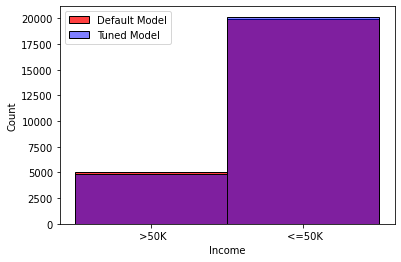

In [192]:
y_pred_wo_income_RF2 = best_model_RF.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_RF,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_RF2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# SVM

In [195]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train,y_train)

y_pred_SVM = SVM.predict(X_test)
evaulation(y_test,y_pred_SVM)

Accuracy Score : 83.5%
Recall Score : 48.57%
Precision Score : 75.32%
F1 Score : 59.06%


Confusion Matrix : 
[[716  39]
 [126 119]]


Income
 <=50K    20711
 >50K      4289
dtype: int64


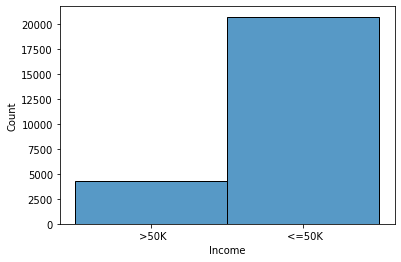

In [202]:
y_pred_wo_income_SVM = SVM.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning Support-Vector-Machine

In [201]:
clf_SVM = SVC()
params_SVM = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1,1,2,4],
    'gamma': ['scale','auto'],
}

grid_search_SVM = GridSearchCV(clf_SVM, params_SVM)
grid_search_SVM.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_SVM.best_params_)
print("Best Score:", grid_search_SVM.best_score_)

best_model_SVM = grid_search_SVM.best_estimator_

y_pred_SVM2 = best_model_SVM.predict(X_test)
evaulation(y_test,y_pred_SVM2)

Best Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Score: 0.84375
Accuracy Score : 84.4%
Recall Score : 54.29%
Precision Score : 75.14%
F1 Score : 63.03%


Confusion Matrix : 
[[711  44]
 [112 133]]


Income
 <=50K    20711
 >50K      4289
dtype: int64


Income
 <=50K    20415
 >50K      4585
dtype: int64


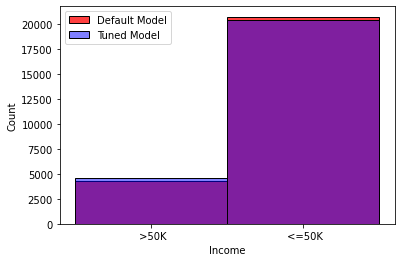

In [203]:
y_pred_wo_income_SVM2 = best_model_SVM.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_SVM2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_SVM2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# k-Nearest Neighbors (KNN)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

k = 2  # Specify the number of neighbors
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train,y_train)

y_pred_KNN = KNN.predict(X_test)
evaulation(y_test,y_pred_KNN)

Accuracy Score : 80.4%
Recall Score : 39.59%
Precision Score : 66.9%
F1 Score : 49.74%


Confusion Matrix : 
[[707  48]
 [148  97]]


Income
 <=50K    21153
 >50K      3847
dtype: int64


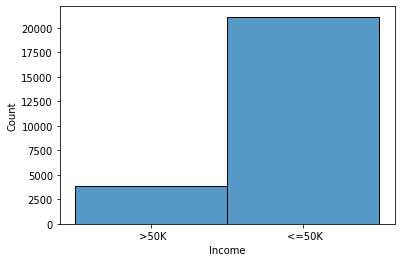

In [205]:
y_pred_wo_income_KNN = KNN.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"]);

## Tuning K-Nearest Neighbour

In [210]:
clf_KNN = KNeighborsClassifier()
params_KNN = {
    'n_neighbors': [5,15,25,40,60],
    # 'weights': ['uniform', 'distance'],
    'leaf_size': [3,4,5,7,10,20,100],
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_KNN = GridSearchCV(clf_KNN, params_KNN)
grid_search_KNN.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search_KNN.best_params_)
print("Best Score:", grid_search_KNN.best_score_)

best_model_KNN = grid_search_KNN.best_estimator_

y_pred_KNN2 = best_model_KNN.predict(X_test)
evaulation(y_test,y_pred_KNN2)

Best Hyperparameters: {'leaf_size': 3, 'n_neighbors': 40}
Best Score: 0.8332499999999999
Accuracy Score : 83.7%
Recall Score : 51.84%
Precision Score : 73.84%
F1 Score : 60.91%


Confusion Matrix : 
[[710  45]
 [118 127]]


Income
 <=50K    21153
 >50K      3847
dtype: int64


Income
 <=50K    20199
 >50K      4801
dtype: int64


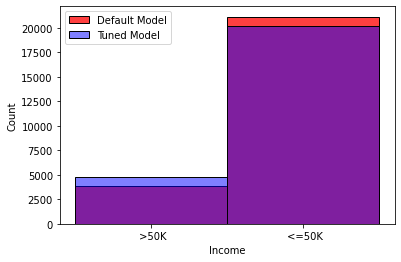

In [211]:
y_pred_wo_income_KNN2 = best_model_KNN.predict(X_pred)

print(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
print("\n")
print(pd.DataFrame(y_pred_wo_income_KNN2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"}).value_counts())
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="r",label="Default Model");
sns.histplot(pd.DataFrame(y_pred_wo_income_KNN2,columns=["Income"]).replace({-1:" <=50K",1:" >50K"})["Income"],color="b",alpha=0.5,label="Tuned Model");
plt.legend(loc="best");

# Neural Network

In [212]:
from keras.models import Sequential
from keras.layers.core import Dense
import tensorflow as tf
from keras.layers.core import Activation

In [285]:
X_train_nn = X_train.to_numpy()
y_train_nn = tf.keras.utils.to_categorical(y_train.replace({-1:2,1:1}))

In [286]:
X_train_nn.shape

(4000, 64)

In [287]:
y_train_nn.shape

(4000, 3)

In [295]:
model = Sequential()

model.add(tf.keras.Input(X_train_nn.shape[1]))
model.add(Dense(128,activation='relu',input_shape = (64,)))
model.add(Dense(64,activation='softmax',input_shape = (128,)))
model.add(Dense(3,activation="softmax",input_shape = (64,)))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [296]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 3)                 195       
                                                                 
Total params: 16,771
Trainable params: 16,771
Non-trainable params: 0
_________________________________________________________________


In [297]:
model.fit(X_train_nn,y_train_nn,epochs=25,batch_size=5)

Epoch 1/25


800/800 [==============================] - 2s 2ms/step - loss: 0.4896 - categorical_accuracy: 0.7558
Epoch 2/25
800/800 [==============================] - 2s 2ms/step - loss: 0.3503 - categorical_accuracy: 0.7560
Epoch 3/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2983 - categorical_accuracy: 0.8382
Epoch 4/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2737 - categorical_accuracy: 0.8357
Epoch 5/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2584 - categorical_accuracy: 0.8410
Epoch 6/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2500 - categorical_accuracy: 0.8413
Epoch 7/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2423 - categorical_accuracy: 0.8407
Epoch 8/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2355 - categorical_accuracy: 0.8435
Epoch 9/25
800/800 [==============================] - 2s 2ms/step - loss: 0.2295 - categorical_accuracy: 0.8490
Epo

In [298]:
prediction = model.predict(X_test.to_numpy())

In [308]:
from sklearn.metrics import classification_report

In [311]:
y_test_nn = y_test.replace({-1:2,1:1}).to_numpy()

In [312]:
print(classification_report(y_test_nn,np.argmax(prediction,axis=1)))

              precision    recall  f1-score   support

         1.0       0.66      0.64      0.65       245
         2.0       0.88      0.89      0.89       755

    accuracy                           0.83      1000
   macro avg       0.77      0.76      0.77      1000
weighted avg       0.83      0.83      0.83      1000



In [314]:
predict_incomes = model.predict(X_pred)
predict_incomes

array([[1.4218349e-06, 9.8872161e-01, 1.1276908e-02],
       [3.4529455e-07, 1.1614106e-03, 9.9883825e-01],
       [5.1919678e-06, 8.6769068e-01, 1.3230415e-01],
       ...,
       [9.9589658e-07, 1.1097250e-02, 9.8890173e-01],
       [1.3076503e-07, 1.8379489e-04, 9.9981612e-01],
       [1.9230427e-07, 4.4242098e-04, 9.9955732e-01]], dtype=float32)

In [321]:
val_counts = np.unique(np.argmax(predict_incomes,axis=1),return_counts=True)[1]

<AxesSubplot:ylabel='Count'>

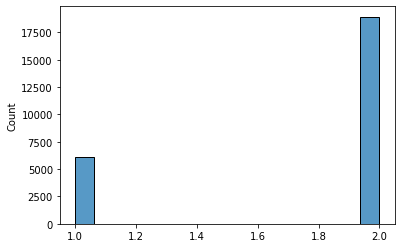

In [326]:
sns.histplot(np.argmax(predict_incomes,axis=1))

In [324]:
val_counts.tolist()

[6063, 18937]